In [1]:
import os
from collections import defaultdict
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'singstat',
 'net_202001_15.net',
 'origin_destination_bus_202001_scaleddown.csv.xz',
 'OD_bus',
 'net_202001_05.net',
 'net_202001_06.net',
 'origin_destination_train_201912.csv.xz',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'net_202001_22.net',
 'subzone_centroid.csv',
 'OD_201912_weekday.csv.xz',
 'origin_destination_bus_201911.csv.xz',
 'net_202001_19.net',
 'net_202001_18.net',
 'transport_node_bus_202001.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'net_202001_10.net',
 'OD_201911_weekend.csv.xz',
 'origin_destination_train_201911.csv.xz',
 'planning-area-2014',
 'net_202001_weekend.net',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'net_202001_21.net',
 'origin_destination_bus_202001.csv.xz',
 'OD_201912_weekend.csv.xz',
 'net_202001_07.net',
 'origin_destination_bus_201912.csv.xz',
 'net_202001_23.net'

In [3]:
gdf = gpd.read_file(os.path.join(data_dir, 'bus_stops_wszone.shp'))
gdf.head()

,PTcode,desc,lat,lon,index_szon,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,...,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,65539,Blk 224A,1.402291,103.893700,265.0,266.0,3.0,MATILDA,PGSZ03,N,...,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06,POINT (34719.631 42683.817)
1,98309,Carissa Pk,1.359960,103.964737,231.0,232.0,8.0,FLORA DRIVE,PRSZ08,N,...,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05,POINT (42625.345 38003.381)
2,65541,Before Sumang Lane,1.403562,103.891200,265.0,266.0,3.0,MATILDA,PGSZ03,N,...,PG,NORTH-EAST REGION,NER,14D0DB33976B7B81,2014-12-05,35089.9853,42728.2745,5361.915964,1.418284e+06,POINT (34441.411 42824.350)
3,49159,Econ Group,1.437072,103.745813,288.0,289.0,5.0,RESERVOIR VIEW,SKSZ05,N,...,SK,NORTH REGION,NR,40050ADDFBCC870F,2014-12-05,18367.1710,45940.4868,10399.424485,3.284130e+06,POINT (18261.920 46529.810)
4,98311,Bef Mariam Wk,1.359306,103.968491,231.0,232.0,8.0,FLORA DRIVE,PRSZ08,N,...,PR,EAST REGION,ER,FA9C76B49B6D0C95,2014-12-05,42801.7349,37930.5489,3956.615777,9.449984e+05,POINT (43043.145 37931.100)


In [4]:
len(gdf), gdf.crs

(5040,
 {'proj': 'tmerc',
  'lat_0': 1.366666666666667,
  'lon_0': 103.8333333333333,
  'k': 1,
  'x_0': 28001.642,
  'y_0': 38744.572,
  'datum': 'WGS84',
  'units': 'm',
  'no_defs': True})

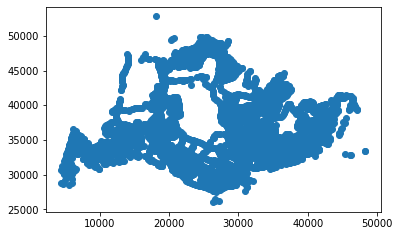

In [5]:
gdf.plot()

In [6]:
bus_stop_loc = {}
for i,s in zip(gdf["PTcode"].tolist(), gdf["SUBZONE_N"].tolist()):
    bus_stop_loc[i] = s

In [7]:

fs = [ f for f in os.listdir(data_dir) if ".csv.xz" in f ]
fs = [ f for f in fs if "origin_destination_bus" in f ] 
fs

['origin_destination_bus_202001_scaleddown.csv.xz',
 'origin_destination_bus_201911.csv.xz',
 'origin_destination_bus_202001.csv.xz',
 'origin_destination_bus_201912.csv.xz']

In [12]:
for f in fs:
    #df = pd.read_csv(os.path.join(data_dir, f))
    month_str = f.replace("origin_destination_bus_", "").replace(".csv.xz", "")
    print(month_str)

201911
202001
201912


In [8]:
df = pd.read_csv(os.path.join(data_dir, "origin_destination_bus_202001_scaleddown.csv.xz"))
df.head(10)

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,1,2020-01,WEEKDAY,16,BUS,4168,10051,3.008418
1,3,2020-01,WEEKDAY,14,BUS,80119,90079,12.033673
2,4,2020-01,WEEKDAY,17,BUS,20281,20141,13.036479
3,6,2020-01,WEEKDAY,7,BUS,19051,10017,1.002806
4,8,2020-01,WEEKDAY,14,BUS,81049,70161,2.005612
5,10,2020-01,WEEKDAY,13,BUS,51059,4019,0.100281
6,13,2020-01,WEEKDAY,10,BUS,82049,15151,7.621326
7,14,2020-01,WEEKDAY,10,BUS,82049,15151,0.401122
8,16,2020-01,WEEKDAY,20,BUS,83169,82149,5.014030
9,19,2020-01,WEEKDAY,9,BUS,14179,3071,1.403929


In [9]:
df_wday = df[df["DAY_TYPE"]=="WEEKDAY"]
len(df_wday)

3891197

In [10]:
df_wday["TOTAL_TRIPS"].sum()/1000000/23

3.7445489782608674

In [11]:
def process_an_hour(df_temp, hr):
    flows = defaultdict(int)
    for i in range(len(df_temp)):
        this_row = df_temp.iloc[i]
        o = this_row["ORIGIN_PT_CODE"]
        d = this_row["DESTINATION_PT_CODE"]
        t = this_row["TOTAL_TRIPS"]
        o2 = bus_stop_loc[str(o)]
        d2 = bus_stop_loc[str(d)]
        flows[(o2, d2)]+=t
    
    flows2 = []
    for k,v in flows.items():
        i,j = k
        d = {"origin":i, "destination":j, "hour":hr, "flow": v}
        flows2.append(d)
    df2 = pd.DataFrame.from_dict(flows2)
    df2 = df2[["origin", "destination", "hour", "flow"]]
    return df2

In [13]:
for hr in range(24):
    temp = df_wday[df_wday["TIME_PER_HOUR"]==hr]
    temp2 = process_an_hour(temp, hr)
    print(hr, len(temp), len(temp2))
    fout = os.path.join(data_dir, "OD_bus", "OD_202001_weekday_{}.csv".format(str(hr).zfill(2)))
    temp2.to_csv(fout, index_label="ind")
    #break

0 53542 9155
1 5497 1495
2 866 479
3 97 50
4 83 48
5 53602 9249
6 165314 17733
7 209873 19521
8 216922 19691
9 210167 19591
10 210902 19761
11 215245 20017
12 223711 20301
13 225498 20442
14 225561 20508
15 229204 20557
16 234765 20679
17 247364 20925
18 248188 20916
19 223048 20040
20 198916 19358
21 187900 19118
22 170561 18558
23 134371 17013


In [14]:
df_wend = df[df["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]
len(df_wend)

2943815

In [15]:
df_wend["TOTAL_TRIPS"].sum()/1000000/8

3.7551366250000013

In [16]:
for hr in range(24):
    temp = df_wend[df_wend["TIME_PER_HOUR"]==hr]
    temp2 = process_an_hour(temp, hr)
    fout = os.path.join(data_dir, "OD_bus", "OD_202001_weekend_{}.csv".format(str(hr).zfill(2)))
    temp2.to_csv(fout, index_label="ind")
    print(hr, len(temp), len(temp2))
    #break

0 39628 7959
1 3785 1313
2 539 366
3 17 17
4 189 121
5 32472 7107
6 104564 15217
7 138329 16983
8 156987 17695
9 162610 17946
10 169221 18374
11 175892 18773
12 181820 19049
13 179640 19135
14 177052 19025
15 176957 19094
16 178343 19188
17 183468 19350
18 178877 18955
19 168797 18620
20 154588 18060
21 144525 17691
22 131897 17052
23 103618 15451
